### Tugas Individu: Klasifikasi Teks Menggunakan Arsitektur RNN
### Klasifikasi Pesan Spam vs Non-Spam Menggunakan Deep Learning Berbasis RNN

- NIM: 442023611088
- Nama: Fayshal Karan Athilla
- Kelas: Teknik Informatika 5 / A1

### IMPORT LIBRARY

In [19]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [20]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### LOAD DATASET

In [21]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']

# Encode label: ham=0, spam=1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

### PREPROCESSING TEXT

In [22]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

### TOKENISASI & PADDING

In [23]:
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['clean_text'])

X = tokenizer.texts_to_sequences(df['clean_text'])
X = pad_sequences(X, maxlen=max_len)

y = df['label'].values

### SPLIT DATA

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### RNN MODEL

In [25]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-06-16 12:23:20.058718: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### TRAIN MODEL

In [26]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 16s 78ms/step - accuracy: 0.8856 - loss: 0.3918 - val_accuracy: 0.9484 - val_loss: 0.1702
Epoch 2/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.9834 - loss: 0.0811 - val_accuracy: 0.9697 - val_loss: 0.0889
Epoch 3/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.9901 - loss: 0.0393 - val_accuracy: 0.9765 - val_loss: 0.0798
Epoch 4/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.9927 - loss: 0.0246 - val_accuracy: 0.9821 - val_loss: 0.0718
Epoch 5/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.9977 - loss: 0.0125 - val_accuracy: 0.9776 - val_loss: 0.0842


### EVALUASI

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



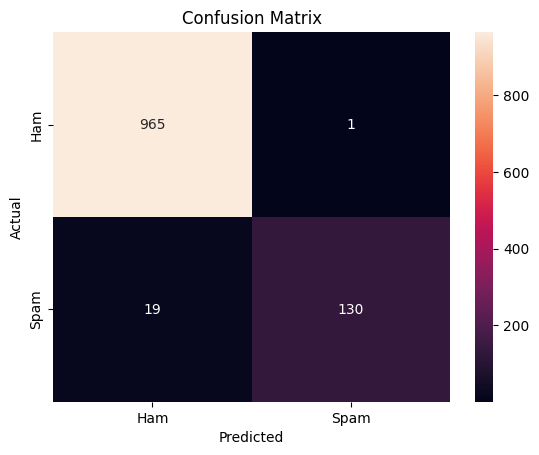

In [27]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### COBA PREDIKSI MANUAL

In [28]:
def predict_spam(text):
    cleaned = clean_text(text)
    seq = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=max_len)
    pred = model.predict(padded)
    return 'Spam' if pred[0][0] > 0.5 else 'Ham'

# Contoh
predict_spam("Congratulations! You won a free iPhone, click the link to claim")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


'Spam'